# Polynomial Regression in Python using Gradient Descent Optimization

There are 2 approaches of Gradient Descent:

1. __Stochastic Gradient Descent__
    In Stochastic Gradient Descent, the Gradient Descent Algorithm is run, taking a single instance from the data-set at a time.

    we need 3 modules to implement the SGD
    
    __hypothesis()__: 
    
    It is the function that calculates and outputs the hypothesis value of the Target Variable, given theta (theta_0 and theta_1) and Feature, X as input. 
    
    __SGD()__: 
    
    It is the function that performs the Stochastic Gradient Descent Algorithm taking 
    
        INPUT
            current values of theta_0 and theta_1, 
            alpha, number of iterations (num_iters), 
            hypothesis value(h), 
            feature set (X) and 
            Target Variable set (y) a
        
        OUTPUT
        
            the optimized theta (theta_0 and theta_1) at each iteration 
            
    __sgd_linear_regression()__: 
    
    It is the principal function that takes as INPUT
    
        the feature set (X), 
        Target Variable set (y), 
        learning rate and 
        number of iterations (num_iters) as input and 
        
        OUTPUTS the final optimized theta i.e., the values of theta_0 and theta_1 for which the cost function almost achieves minima
            

2. Batch Gradient Descent

    In Batch Gradient Descent, the Gradient Descent Algorithm is run, taking all the instances from the data-set at once.

    __hypothesis()__: It is the function that calculates and outputs the hypothesis value of the Target Variable, given theta (theta_0 and theta_1) and Feature, X as input. 

    __BGD()__: 
    
    It is the function that performs the Batch Gradient Descent Algorithm taking 
    
       current values of theta_0 and theta_1, 
       alpha, number of iterations (num_iters), 
       list of hypothesis values of all samples(h), 
       feature set (X) and 
       Target Variable set (y) as input 
       
       and outputs 
           the optimized theta (theta_0 and theta_1), 
           theta_0 history (theta_0) and 
           theta_1 history (theta_1) i.e., 
           
           the value of theta_0 and theta_1 at each iteration and finally the cost history which contains the value of the cost function over all the iterations.
           
     __linear_regression()__: 
     
     It is the principal function that takes 
     
         the feature set (X), 
         Target Variable set (y), 
         learning rate and number of iterations (num_iters) as input 
         
         and outputs 
         
             the final optimized theta i.e., the values of theta_0 and theta_1 for which the cost function almost achieves minima following Batch Gradient Descent and cost which stores the value of cost for every iteration.

In [11]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### Stochastic Gradient Descent

In [12]:
np.ones((5, 1))

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [13]:
def hypothesis(theta, X):
    
    h = np.ones((X.shape[0], 1))
    
    for i in range(0, X.shape[0]):
        x    = np.concatenate((np.ones(1), np.array([X[i]])), axis = 0)
        
        h[i] = float(np.matmul(theta, x))
        
    h = h.reshape(X.shape[0])
    
    return h

In [14]:
def SGD(theta, alpha, num_iters, h, X, y):
    
    for i in range(0,num_iters):
        
        theta[0] = theta[0] - (alpha) * (h - y)
        theta[1] = theta[1] - (alpha) * ((h - y) * X)
        
        h = theta[1]*X + theta[0] 
        
    return theta

In [25]:
def sgd_linear_regression(X, y, alpha, num_iters):
    
    # initializing the parameter vector...
    theta = np.zeros(2)
    
    # hypothesis calculation....
    h = hypothesis(theta, X)    
    
    # returning the optimized parameters by Gradient Descent...
    for i in range(0, X.shape[0]):
        theta = SGD(theta, alpha, num_iters, h[i], X[i], y[i])
        
    theta = theta.reshape(1, 2)
    
    return theta

In [16]:
data = pd.read_csv(r'E:\MYLEARN\2-ANALYTICS-DataScience\datasets\ex1data1.txt', 
                   names = ['population', 'profit'])

In [17]:
data.shape

(97, 2)

In [18]:
data.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [19]:
# Split population and profit into X and y
X_df = pd.DataFrame(data.population)
y_df = pd.DataFrame(data.profit)

In [21]:
X_train = data.values[:, 0] # the feature_set
y_train = data.values[:, 1] # the labels

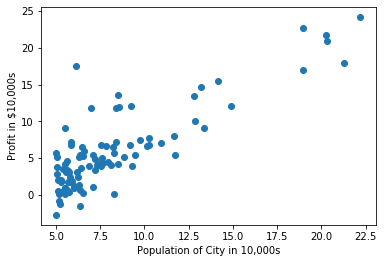

In [23]:
plt.scatter(X_train, y_train)

plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s');

In [29]:
# calling the principal function with 
# learning_rate = 0.0001  
# num_iters = 100000
theta = sgd_linear_regression(X_train, y_train, 0.001, 100000)

In [30]:
theta

array([[-0.70788328,  0.24369278]])

Text(0, 0.5, 'Profit in $10,000s')

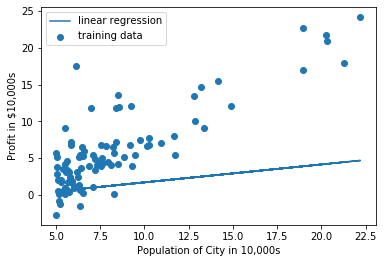

In [31]:
# getting the predictions...
training_predictions = hypothesis(theta, X_train)

scatter         = plt.scatter(X_train, y_train, label="training data")
regression_line = plt.plot(X_train, training_predictions
                           , label="linear regression")

plt.legend()
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')

### Batch Gradient Descent:

In [35]:
def BGD(theta, alpha, num_iters, h, X, y):
    cost = np.ones(num_iters)
    theta_0 = np.ones(num_iters)
    theta_1 = np.ones(num_iters)
    for i in range(0,num_iters):
        theta[0] = theta[0] - (alpha/X.shape[0]) * sum(h - y)
        theta[1] = theta[1] - (alpha/X.shape[0]) * sum((h - y) * X)
        h = hypothesis(theta, X)
        cost[i] = (1/X.shape[0]) * 0.5 * sum(np.square(h - y))
        theta_0[i] = theta[0]
        theta_1[i] = theta[1]
    theta = theta.reshape(1,2)
    return theta, theta_0, theta_1, cost

In [36]:
def linear_regression(X, y, alpha, num_iters):

    # initializing the parameter vector...
    theta = np.zeros(2)
    
    # hypothesis calculation....
    h = hypothesis(theta, X)    
    
    # returning the optimized parameters by Gradient Descent...
    theta,theta_0,theta_1,cost= BGD(theta,alpha,num_iters,h,X,y)
    
    return theta, theta_0, theta_1, cost

In [37]:
X_train = data.values[:, 0] # the feature_set
y_train = data.values[:, 1] # the labels

In [38]:
# calling the principal function with learning_rate = 0.0001 and  
# num_iters = 300
theta,theta_0,theta_1,cost=linear_regression(X_train,y_train,
                                             0.001,300)

In [39]:
theta

array([[-0.12956515,  0.81467642]])

Text(0, 0.5, 'Profit in $10,000s')

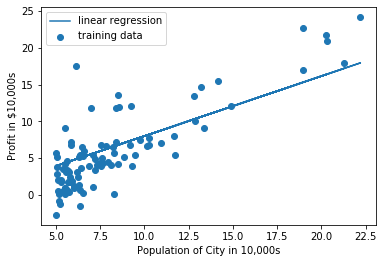

In [40]:
training_predictions = hypothesis(theta, X_train)

scatter = plt.scatter(X_train, y_train, label="training data")
regression_line = plt.plot(X_train, 
                           training_predictions, label="linear regression")

plt.legend()
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')

Also, the cost has been reduced in the course of Batch Gradient Descent iteration-by-iteration. 

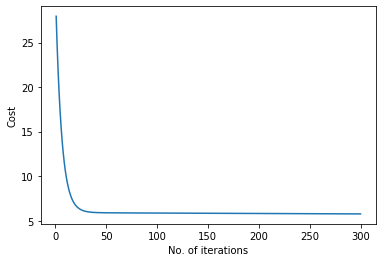

In [43]:
# Line Curve for representing reduction in cost in 300 iterations:
cost = list(cost)

n_iterations = [x for x in range(1,301)]

plt.plot(n_iterations, cost)

plt.xlabel('No. of iterations')
plt.ylabel('Cost');

Text(0.5, 0, 'J')

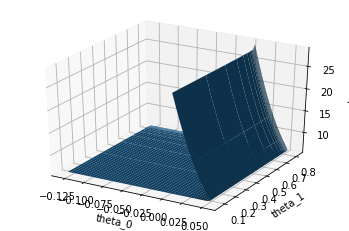

In [45]:
# Surface Plot for representing reduction in cost:
J = np.ones((300,300))
in1 = 0
in2 = 0

theta_0 = theta_0.reshape(300)
theta_1 = theta_1.reshape(300)

for i in theta_0:
    for j in theta_1:
        t = np.array([i,j])
        h = hypothesis(t, X_train)
        J[in1][in2]=(1/X_train.shape[0])*0.5*sum(np.square(h-y_train))
        in2 = in2 + 1
    in1 = in1 + 1
    in2 = 0
    
#from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
X,Y = np.meshgrid(theta_0, theta_1)

ax.plot_surface(X, Y, J)
ax.set_xlabel('theta_0')
ax.set_ylabel('theta_1')
ax.set_zlabel('J')